# Linear Regression and Gradient Descent from Scratch

In this notebook, we will implement **linear regression** using **gradient descent** from scratch. Linear regression is a supervised learning algorithm used to predict a continuous target variable \( y \) based on one or more input features \( X \).

We will use **gradient descent**, an optimization algorithm, to find the best parameters (weights) for our linear regression model.

---

## The Model: Linear Regression

The model for simple linear regression with one feature \( x \) and the target \( y \) is represented by the following equation:


$y = m \cdot x + b$

Where:
- \( m \) is the slope (weight) of the feature \( x \),
- \( b \) is the intercept (bias term),
- \( x \) is the input feature,
- \( y \) is the predicted output.

For multiple features, the model generalizes to:

$y = b + m \cdot x_1 + m \cdot x_2 + \dots + m \cdot x_n$

Where:
- \( b \) is the intercept,
- \( m \) are the weights corresponding to each feature $( x_1, x_2, \dots, x_n $).

---

## Cost Function (Mean Squared Error)

In linear regression, we use a cost function to measure the difference between the predicted and actual values. The most common cost function used is **Mean Squared Error (MSE)**, defined as:

$J(b, m) = \frac{1}{n} \sum_{i=1}^{n} \left( y^{(i)} - \hat{y}^{(i)} \right)^2$

Where:
- $( n )$ is the number of data points,
- $( \hat{y}^{(i)} $) is the predicted value using the linear model for the $( i $)-th example,
- $( y^{(i)} $) is the actual value for the $( i $)-th example.

This function measures how far off the predictions are from the actual values. Our goal is to minimize this function.

---

## Gradient Descent

Gradient descent is an iterative optimization algorithm used to minimize the cost function. It updates the parameters \( b, m \) by moving them in the direction of the negative gradient of the cost function.

The update rule for the parameters is:

$b = b - \alpha \frac{\partial}{\partial b} J(b, m)$

$m = m - \alpha \frac{\partial}{\partial m} J(b, m)$

Where:
- $( \alpha $) is the learning rate (step size),
- $( \frac{\partial}{\partial b} J(b, m) $) is the partial derivative of the cost function with respect to $( b $),
- $( \frac{\partial}{\partial m} J(b, m) $) is the partial derivative of the cost function with respect to $( m $).

The partial derivatives of the cost function are:

$\frac{\partial}{\partial b} J(b, m) = - \frac{2}{n} \sum_{i=1}^{n} \left( \hat{y}^{(i)} - y^{(i)} \right)$

$\frac{\partial}{\partial m} J(b, m) = - \frac{2}{n} \sum_{i=1}^{n} \left( \hat{y}^{(i)} - y^{(i)} \right) x_i$

The gradient descent algorithm will iteratively update \( b \) and \( m \) until the cost function converges to a minimum.

---


Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

Create dataset

In [3]:
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
df = pd.DataFrame(X, columns=['Feature'])
df['Target'] = y

Plot dataset

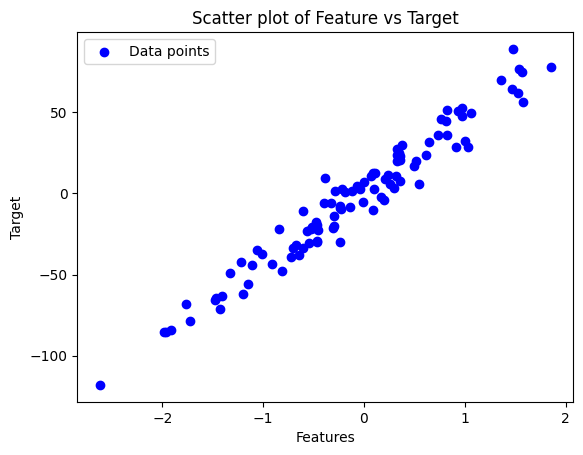

In [7]:
plt.scatter(df.Feature, df.Target, color='blue', label="Data points")
plt.xlabel('Features')
plt.ylabel('Target')
plt.title('Scatter plot of Feature vs Target')
plt.legend()
plt.show()

We define the loss function to calculate the mean squared error between the predicted and actual values, summing the squared differences and averaging over all data points.

In [8]:
def loss_function(m, b, df):
    total_error = 0
    for i in range(len(df)):
        x = df.iloc[i].Features
        y = df.iloc[i].Target
        total_error += (y - (m * x + b)) ** 2
    total_error / float(len(df))

We define the gradient descent function to compute the gradients of the cost function with respect to the model parameters **m** and **b**, and update the parameters using the learning rate **a** to minimize the cost.

In [9]:
def gradient_descent(m_curr, b_curr, data, a):
    m_gradient = 0
    b_gradient = 0
    n = len(df)

    for i in range(n):
        x = df.iloc[i].Feature
        y = df.iloc[i].Target

        m_gradient += -(2/n) * x * (y - (m_curr * x + b_curr))
        b_gradient += -(2/n) * (y - (m_curr * x + b_curr))

    m = m_curr - a * m_gradient
    b = b_curr - a * b_gradient
    return m, b

We initialize the parameters and run gradient descent for a specified number of epochs to optimize the model's coefficients.

In [10]:
m = 0
b = 0
a = 0.01
epochs = 350
for i in range(epochs):
    m, b = gradient_descent(m, b, df, a)

print(f'm: {m}')
print(f'b: {b}')

m: 44.28089763910492
b: 1.103618486991641


Plot dataset after gradient descent

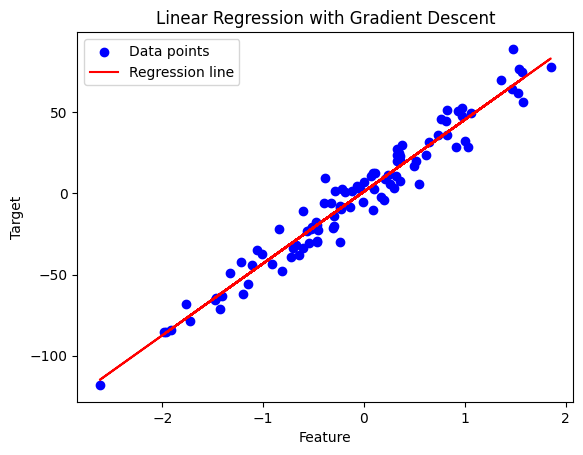

In [11]:
df['Predicted'] = m * df['Feature'] + b
plt.scatter(df['Feature'], df['Target'], color='blue', label='Data points')
plt.plot(df['Feature'], df['Predicted'], color='red', label='Regression line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression with Gradient Descent')
plt.legend()
plt.show()